# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$   gemessen und das Ergebnis in WAV-Dateien abgespeichert.

**1) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien und extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

*Hinweise:*
  * *WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete kleine zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden.*
  * *Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*
  * *Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss.*
  * *Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden.*

In [1]:
import numpy as np
import pandas as pd
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Anfangswerte
path = "./data_HA4/"
minValue = 100

In [3]:
def name2float(filename):
    """
    Return Durchmesser(dm) und geschwindigkeit(v) aus Dateiname
    AB_mm_CDoEF_mps.wav
    dm = AB [mm]
    v = CD.EF [m/s]
    """
    o = filename.find("o")
    dm = float(filename[:2])
    v = float(filename[o-2:o] + "." + filename[o+1:o+3])        
    return dm,v

In [4]:
def files2data(path):
    """
    Data from all .wav files in the folder of path convert to list of dictionarys and pandas DataFrame
    """
    D = []                                   # list of data
    filenames = os.listdir("./data_HA4")     # list of all files from folder
    for f in filenames:
        dm,v = name2float(f)                 # filename to float
        p = path + f
        samplerate, signal = wavfile.read(p) # read wavfile
        D.append({"Filename":f,
                  "Diameter [mm]":dm,
                  "Speed [m/s]":v,
                  "Samplerate":samplerate,
                  "Signal":signal})
    return pd.DataFrame(D)                   # pandas DataFrame

In [5]:
Data_00 = files2data(path)
Data_00

,Filename,Diameter [mm],Speed [m/s],Samplerate,Signal
0,06_mm_08o32_mps.wav,6.0,8.32,51200,"[2528, 2546, 3208, 1988, 2005, 1761, 2842, 259..."
1,06_mm_10o73_mps.wav,6.0,10.73,51200,"[20467, 20251, 20086, 20210, 20096, 20024, 197..."
2,06_mm_14o10_mps.wav,6.0,14.10,51200,"[3593, 3598, 3789, 3930, 4512, 4494, 4185, 358..."
3,06_mm_18o69_mps.wav,6.0,18.69,51200,"[7282, 7499, 6987, 6900, 6662, 6465, 6312, 596..."
4,06_mm_22o10_mps.wav,6.0,22.10,51200,"[8917, 8079, 7313, 6748, 5740, 5396, 4471, 387..."
5,06_mm_25o06_mps.wav,6.0,25.06,51200,"[6291, 5828, 5583, 4735, 4411, 3335, 2084, 121..."
6,06_mm_29o76_mps.wav,6.0,29.76,51200,"[8364, 8270, 6706, 5022, 3583, 2039, 901, 206,..."
7,06_mm_34o00_mps.wav,6.0,34.00,51200,"[-6485, -7223, -7547, -6733, -6439, -5332, -50..."
8,06_mm_37o25_mps.wav,6.0,37.25,51200,"[391, 1967, 4228, 5161, 6788, 6856, 7895, 7925..."
9,06_mm_40o95_mps.wav,6.0,40.95,51200,"[-2418, -2295, -2339, -1741, -1379, -837, 35, ..."


In [6]:
def plotWave(Data):
    n = len(Data)
    fig, axs = plt.subplots(n,1,figsize=(15,n*2))
    for ax,signal,filename in zip(axs,Data["Signal"],Data["Filename"]):
        ax.plot(signal)
        ax.set_title(filename)
        ax.set_xlabel("t [s]")                                    # ??? time [s] ???
        fig.tight_layout()

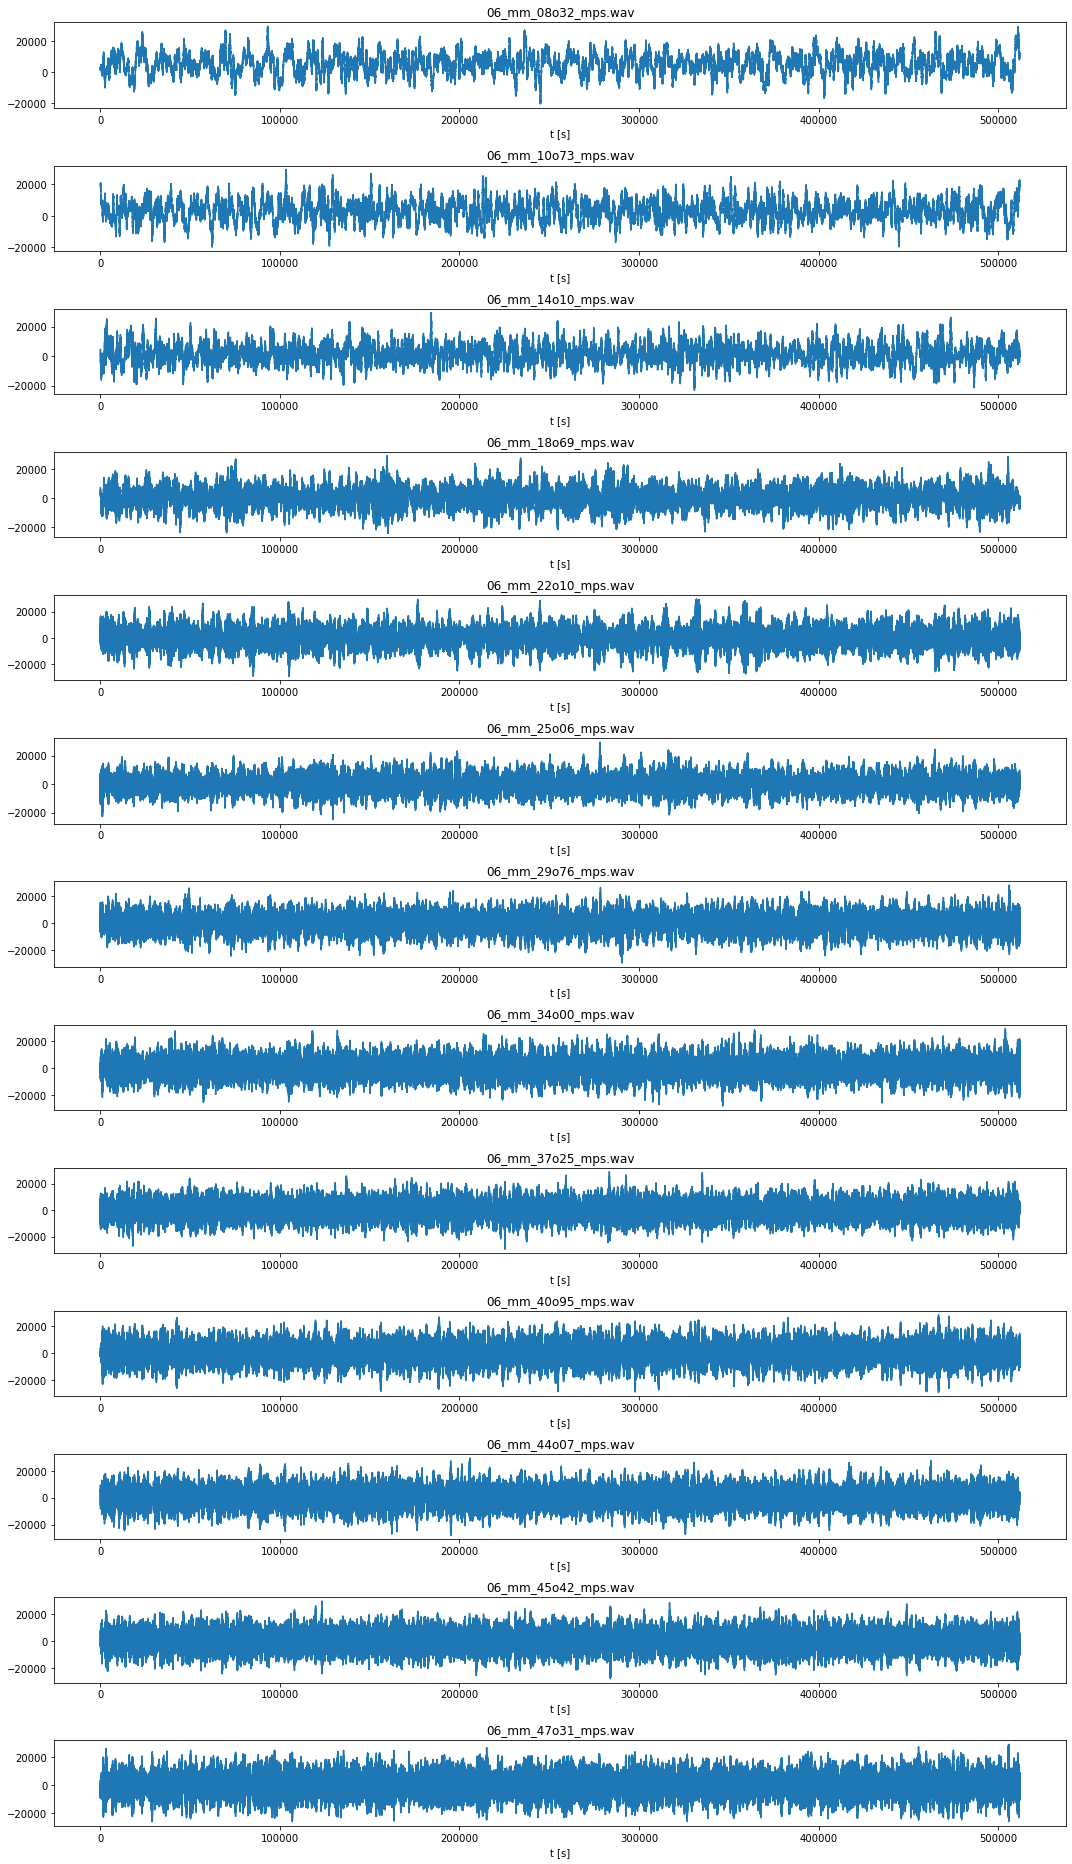

In [7]:
plotWave(Data_00)

Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

**2) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
_Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt._

In [8]:
def signal2freq(Data):
    F = []                                               # list of Fourier Trafo and Frequence
    for signal,samplerate in zip(Data["Signal"],Data["Samplerate"]):
        ftt = np.fft.rfft(signal, n=None)                # Fourier Trafo
        ftt2 = np.abs(ftt)**2                            # |FTT|^2
        freq = np.fft.rfftfreq(signal.size,1/samplerate) # Frequence
        F.append({"Fourier Trafo":ftt,
                  "|FTT|^2":ftt2,
                  "Frequences":freq})
    return Data.join(pd.DataFrame(F))                    # pandas DataFrame

In [9]:
Data_ftt = signal2freq(Data_00)
Data_ftt

,Filename,Diameter [mm],Speed [m/s],Samplerate,Signal,Fourier Trafo,|FTT|^2,Frequences
0,06_mm_08o32_mps.wav,6.0,8.32,51200,"[2528, 2546, 3208, 1988, 2005, 1761, 2842, 259...","[(2697521097+0j), (9843949.070377022+9460723.5...","[7.276620068760083e+18, 186408624306507.3, 226...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
1,06_mm_10o73_mps.wav,6.0,10.73,51200,"[20467, 20251, 20086, 20210, 20096, 20024, 197...","[(1619578021+0j), (-3316138.611804399-15495089...","[2.6230329661062764e+18, 251094562964040.06, 8...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
2,06_mm_14o10_mps.wav,6.0,14.10,51200,"[3593, 3598, 3789, 3930, 4512, 4494, 4185, 358...","[(713112407+0j), (2593615.2697466565+3876112.2...","[5.085293050173336e+17, 21751086489594.47, 457...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
3,06_mm_18o69_mps.wav,6.0,18.69,51200,"[7282, 7499, 6987, 6900, 6662, 6465, 6312, 596...","[(250693817+0j), (-4490022.111351649+330918.83...","[6.284738988202949e+16, 20269805837381.996, 19...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
4,06_mm_22o10_mps.wav,6.0,22.10,51200,"[8917, 8079, 7313, 6748, 5740, 5396, 4471, 387...","[(114776826+0j), (8101302.687247174-194219.623...","[1.3173719786634276e+16, 65668826492442.305, 1...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
5,06_mm_25o06_mps.wav,6.0,25.06,51200,"[6291, 5828, 5583, 4735, 4411, 3335, 2084, 121...","[(75885864+0j), (-6336436.049033054+307640.596...","[5758664355026496.0, 40245064540041.42, 524705...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
6,06_mm_29o76_mps.wav,6.0,29.76,51200,"[8364, 8270, 6706, 5022, 3583, 2039, 901, 206,...","[(55609917+0j), (-1654063.0145021132+48161.352...","[3092462868746889.0, 2738243971853.2183, 34977...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
7,06_mm_34o00_mps.wav,6.0,34.00,51200,"[-6485, -7223, -7547, -6733, -6439, -5332, -50...","[(36616456+0j), (-1784669.5306817042-141958.46...","[1340764849999936.0, 3205197538645.1655, 50366...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
8,06_mm_37o25_mps.wav,6.0,37.25,51200,"[391, 1967, 4228, 5161, 6788, 6856, 7895, 7925...","[(23096611+0j), (-715528.5420134312+207959.049...","[533453439685321.0, 555228060842.9795, 7474103...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
9,06_mm_40o95_mps.wav,6.0,40.95,51200,"[-2418, -2295, -2339, -1741, -1379, -837, 35, ...","[(14439077+0j), (-1151586.6288655242-111300.48...","[208486944611929.0, 1338539561488.0098, 156070...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."


In [10]:
def plotFreq1(Data,minValue):
    plt.figure(figsize=(15,5))
    maxfreq = 2500
    for ftt2,freq,filename in zip(Data["|FTT|^2"],Data["Frequences"],Data["Filename"]):
        m = np.searchsorted(freq,maxfreq,side='right') # inkulusive maxfreq
        plt.plot(freq[:m],ftt2[:m],alpha=0.5,label=filename)
    plt.axvline(minValue,ls='--',c='r',ymax=1,label=f'{minValue}')
    plt.yscale("log")
    plt.title("xy")
    plt.xlabel("Frequence")
    plt.ylabel("abs()^2")
    plt.legend(loc="upper right")

In [11]:
def plotFreq2(Data,minValue,ylog=True):
    n = len(Data)
    maxfreq = 2500
    fig, axs = plt.subplots(n,1,figsize=(15,n*2))
    for ax,ftt2,freq,filename in zip(axs,Data["|FTT|^2"],Data["Frequences"],Data["Filename"]):
        m = np.searchsorted(freq,maxfreq,side='right') # inkulusive maxfreq
        ax.plot(freq[:m],ftt2[:m],alpha=0.5)
        ax.axvline(minValue,ls='--',c='r',ymax=1,label=f'{minValue}')
        if ylog == True:
            ax.set_yscale("log")
        ax.set_title(filename)
        ax.set_xlabel("Frequence")
        ax.set_ylabel("abs()^2")
        ax.legend(loc="upper right")
    fig.tight_layout()

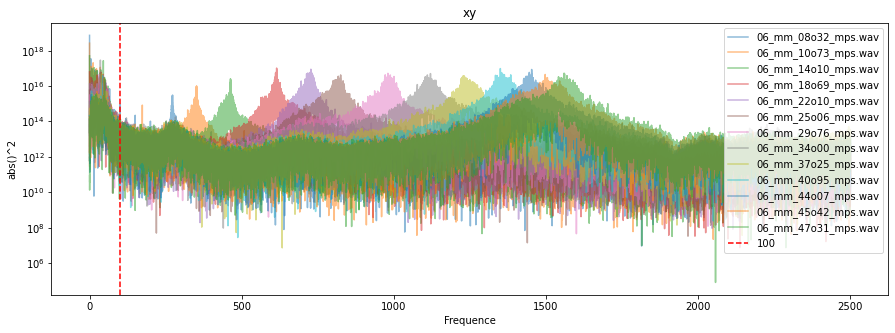

In [12]:
plotFreq1(Data_ftt,minValue)

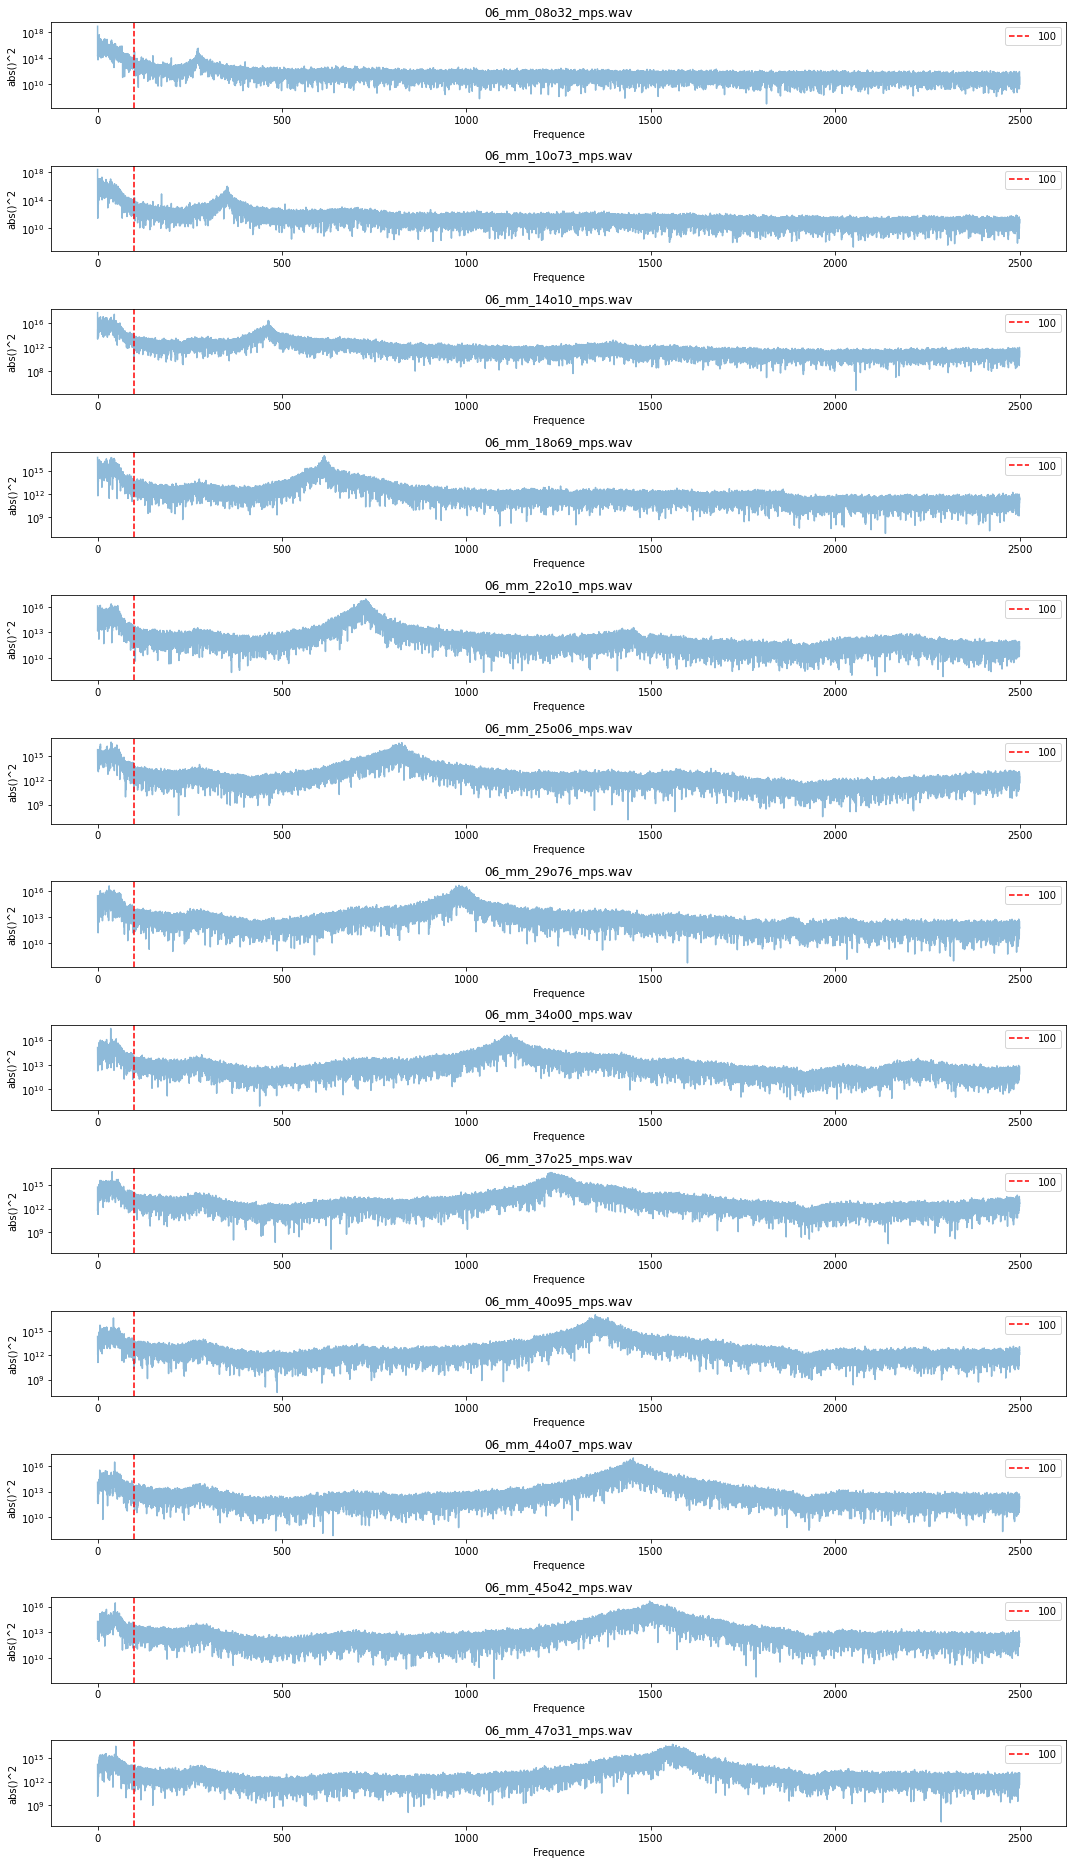

In [13]:
plotFreq2(Data_ftt,minValue)

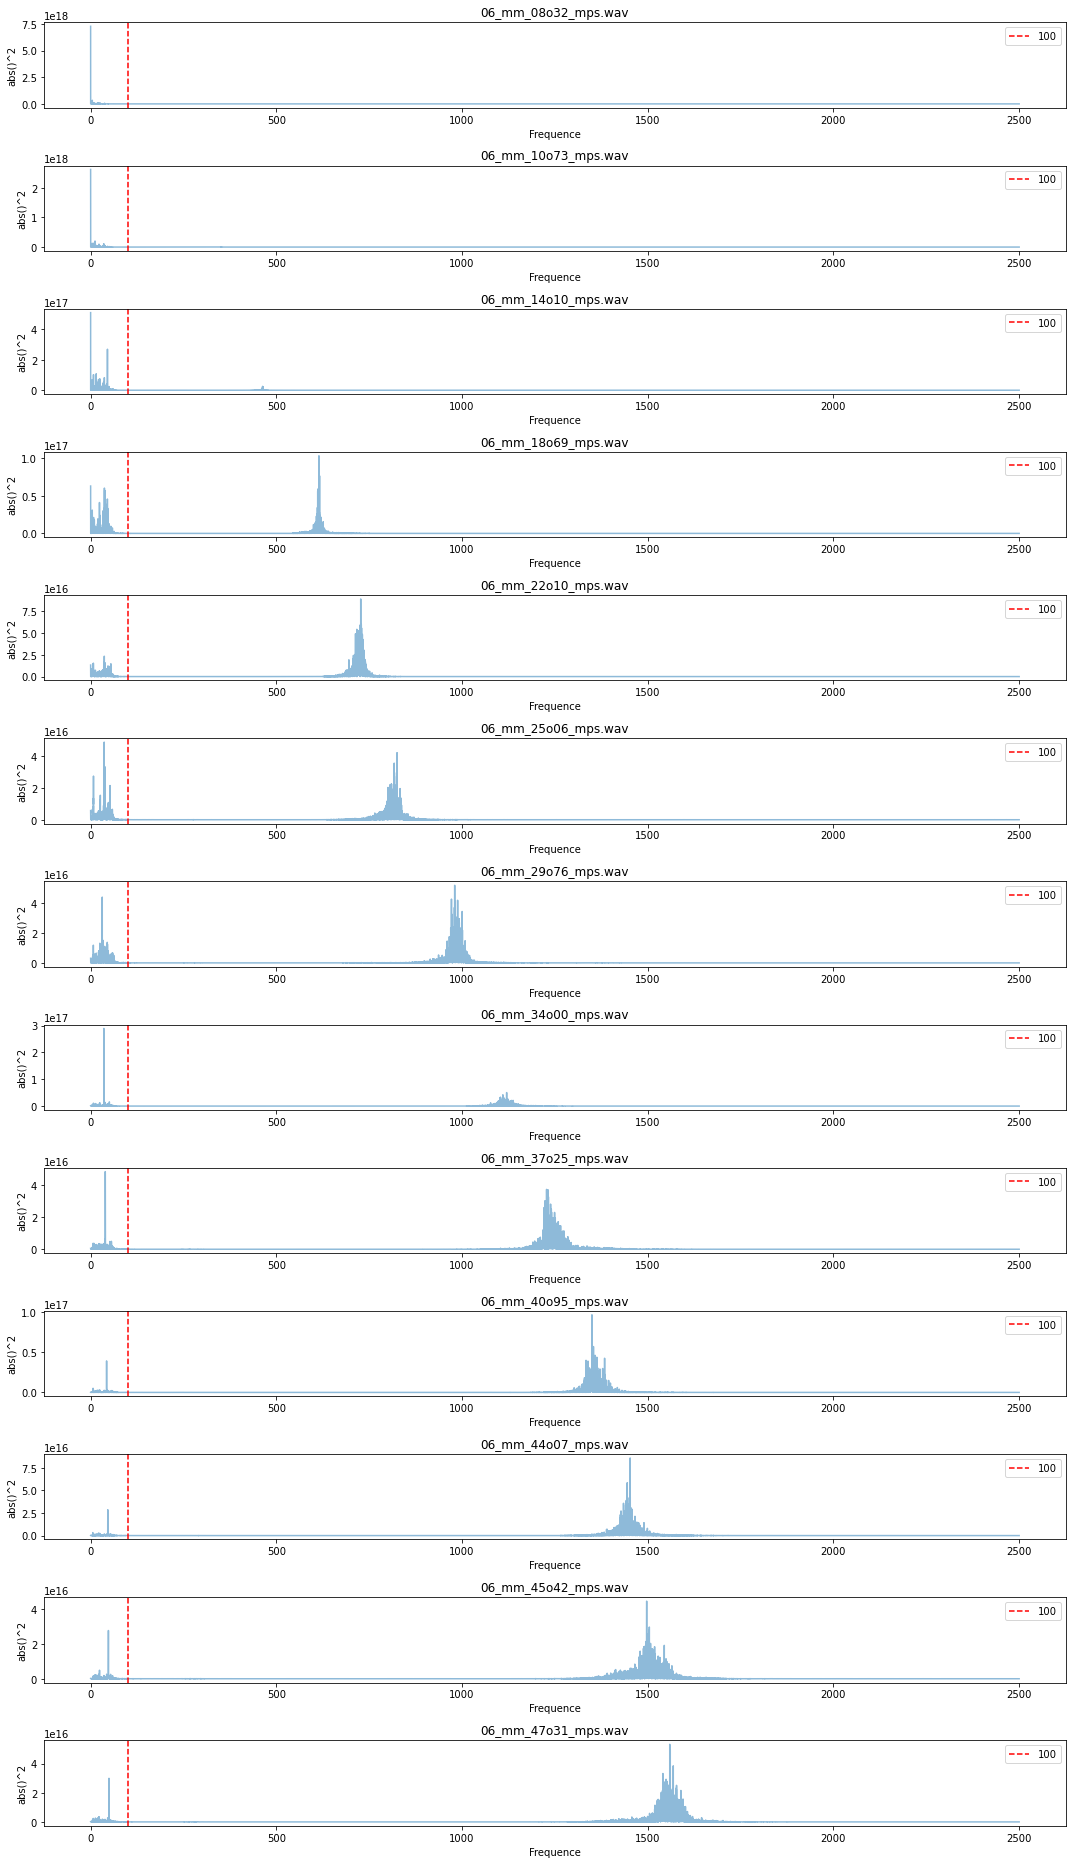

In [14]:
plotFreq2(Data_ftt,minValue,ylog=False)

**3) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [15]:
def charTone(Data,minValue):
    mF = []
    for freq,ftt2 in zip(Data["Frequences"],Data["|FTT|^2"]):
        posmin = np.searchsorted(freq,minValue)        # consider only the frequences > minValue
        ftt2 = ftt2[posmin:]                           # consider only the frequences > minValue
        pos = posmin + np.where(ftt2==np.max(ftt2))[0] # Position of the max value
        maxfreq = freq[pos][0]
        mF.append({"Char. Tone [Hz]":maxfreq})
    return Data.join(pd.DataFrame(mF))                 # pandas DataFrame

In [16]:
Data = charTone(Data_ftt,minValue)
# Data für HA5
Data.loc[:,["Speed [m/s]","Char. Tone [Hz]"]].to_csv("./data_HA5/vf_d6mm_HA4.csv",index=False)
pd.read_csv("./data_HA5/vf_d6mm_HA4.csv")

,Speed [m/s],Char. Tone [Hz]
0,8.32,272.8
1,10.73,351.7
2,14.10,463.0
3,18.69,614.7
4,22.10,727.2
5,25.06,825.0
6,29.76,980.2
7,34.00,1120.1
8,37.25,1227.6
9,40.95,1349.7


# <span style="background-color:red">FRAGE:</span>
- ohne for-loop ?

In [17]:
Data_ftt["|FTT|^2"].apply(np.argmax)

0         0
1         0
2         0
3      6147
4      7272
5       366
6      9802
7       356
8       394
9     13497
10    14526
11    14971
12    15592
Name: |FTT|^2, dtype: int64

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

__4) Schreiben Sie eine Funktion *ab()*, die für beliebige, gleich lange Arrays *v* und *f* die Geraden-Parameter *a* und *b* berechnet und zurückgibt.__

In [18]:
def ab(v,f):
    v = np.array(v)
    f = np.array(f)
    a = ((v-np.mean(v)) @ (f-np.mean(f))) / np.sum((v-np.mean(v))**2)
    b = np.mean(f) - a*np.mean(v)
    return a,b

In [19]:
v = Data["Speed [m/s]"]
f = Data["Char. Tone [Hz]"]
a,b = ab(v,f)
print(f'a = {a:.3f}\nb = {b:.3f}')

a = 33.011
b = -2.242


**5) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 3 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**
  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

In [20]:
def plotRegr(v,f,points):
    a,b = ab(v,f)
    x = np.arange(55)
    y = a*points+b
    plt.figure(figsize=(15,5))
    plt.plot(v,f,'o',label="Data Points")
    plt.plot(x,a*x+b, label=f"Regressionsgerade\n     a =  {a:.1f}\n     b = {b:.1f}")
    plt.plot(points,y,'ro',label="Test Points")
    plt.xlabel("Speed [m/s]")
    plt.ylabel("Char. Tone [Hz]")
    plt.legend(loc="lower right")
    plt.grid()
    return pd.DataFrame({"Speed":points,"Char. Tone":np.around(y,1)})

,Speed,Char. Tone
0,15,492.9
1,42,1384.2
2,50,1648.3


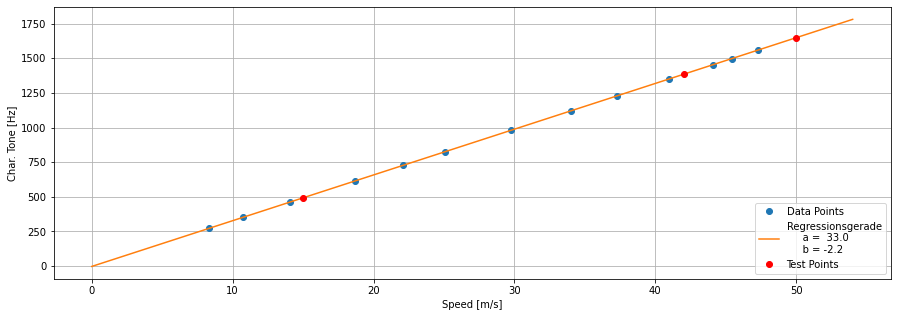

In [21]:
points = np.array([15,42,50])
T = plotRegr(v,f,points)
T

In [22]:
def mean_std(v,f,absolut=False):
    a,b = ab(v,f)
    abw = f-(a*v+b)
    if absolut == True:
        abw = abs(abw)
    return abw, np.mean(abw), np.std(abw)

 Abw. :  Mean = -0.000, Standardabweichung = 0.182
|Abw.|:  Mean =  0.136, Standardabweichung = 0.121


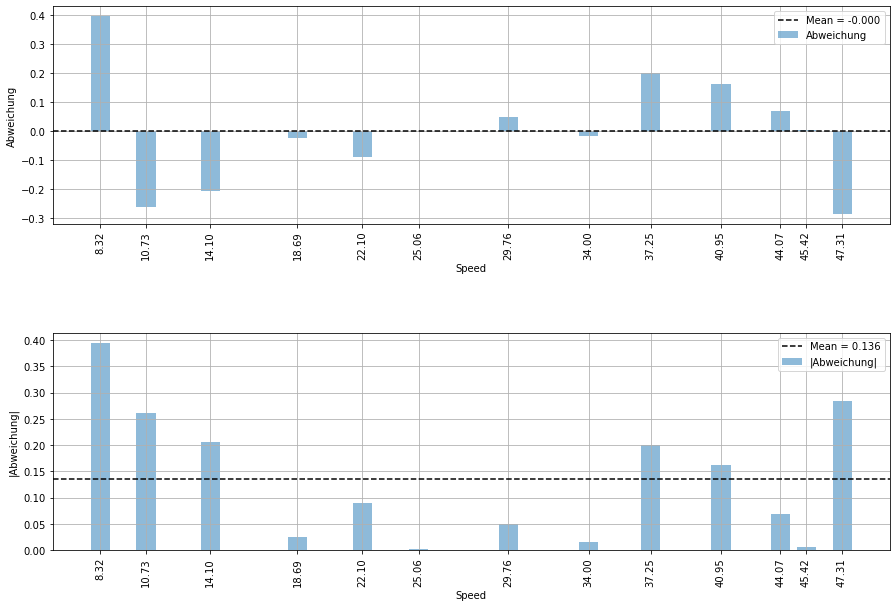

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
abw,mean,std = mean_std(v,f)
print(f" Abw. :  Mean = {mean:.3f}, Standardabweichung = {std:.3f}")
plt.bar(v,abw,width=1,alpha=0.5,label="Abweichung")
plt.axhline(mean,ls='--',c='k',label=f"Mean = {mean:.3f}")
plt.xticks(v,rotation=90)
plt.xlabel("Speed")
plt.ylabel("Abweichung")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
abw,mean,std = mean_std(v,f,absolut=True)
print(f"|Abw.|:  Mean =  {mean:.3f}, Standardabweichung = {std:.3f}")
plt.bar(v,abw,width=1,alpha=0.5,label="|Abweichung|")
plt.axhline(mean,ls='--',c='k',label=f"Mean = {mean:.3f}")
plt.xticks(v,rotation=90)
plt.xlabel("Speed")
plt.ylabel("|Abweichung|")
plt.legend()
plt.grid()
plt.subplots_adjust(hspace=0.5)